In [100]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
import xgboost as xgb

from scipy import stats
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score,roc_auc_score, recall_score, f1_score, roc_auc_score, confusion_matrix


from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [72]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [2]:
df= pd.read_csv('Hourly Data.csv',encoding='unicode_escape')

In [3]:
df1= pd.read_csv('CO2_ind.csv',encoding='unicode_escape')

In [4]:
df1

,nodeid,temperature,humidity,pressure,co2,devicetimestamp
0,700,20.96,18.80,979.8,395,1546300817
1,700,20.95,18.81,979.8,395,1546300868
2,700,20.95,18.81,979.8,395,1546300919
3,700,20.95,18.84,979.7,395,1546300970
4,700,20.96,18.83,979.6,395,1546301021
...,...,...,...,...,...,...
515169,700,21.28,20.82,995.9,396,1577836540
515170,700,21.30,20.82,995.9,396,1577836600
515171,700,21.31,20.84,996.0,396,1577836660
515172,700,21.32,20.82,995.9,396,1577836720


In [5]:
df0 = df1.iloc[:462680]
df0

,nodeid,temperature,humidity,pressure,co2,devicetimestamp
0,700,20.96,18.80,979.8,395,1546300817
1,700,20.95,18.81,979.8,395,1546300868
2,700,20.95,18.81,979.8,395,1546300919
3,700,20.95,18.84,979.7,395,1546300970
4,700,20.96,18.83,979.6,395,1546301021
...,...,...,...,...,...,...
462675,700,21.30,24.99,1014.1,410,1574644542
462676,700,21.32,24.98,1014.1,410,1574644602
462677,700,21.31,24.97,1014.0,411,1574644663
462678,700,21.32,24.96,1014.0,411,1574644722


In [6]:
columns_to_drop = ['nodeid','temperature','humidity','pressure','devicetimestamp']
 #Strip leading/trailing whitespaces from column names
columns_to_drop = [col.strip() for col in columns_to_drop]

# Check if columns exist in the DataFrame before dropping
existing_columns = [col for col in columns_to_drop if col in df0.columns]

# Drop the existing columns
df0 = df0.drop(columns=existing_columns)

In [7]:
df0

,co2
0,395
1,395
2,395
3,395
4,395
...,...
462675,410
462676,410
462677,411
462678,411


In [8]:
df

,City,Datetime,PM2.5,NO,NO2,CO,SO2,AQI,AQI_Bucket
0,Delhi,1/2/2015 0:00,358.68,153.72,43.71,20.02,7.00,501.0,Severe
1,Delhi,1/2/2015 1:00,444.44,199.28,44.46,27.20,5.17,548.0,Severe
2,Delhi,1/2/2015 2:00,464.64,241.26,43.69,0.61,6.33,554.0,Severe
3,Delhi,1/2/2015 3:00,344.05,120.88,40.56,0.55,5.67,558.0,Severe
4,Delhi,1/2/2015 4:00,358.07,177.31,40.35,0.56,7.67,562.0,Severe
...,...,...,...,...,...,...,...,...,...
462675,Visakhapatnam,6/30/2020 20:00,9.50,2.75,25.57,0.62,NaN,51.0,Satisfactory
462676,Visakhapatnam,6/30/2020 21:00,17.25,3.62,33.20,0.76,2.02,51.0,Satisfactory
462677,Visakhapatnam,6/30/2020 22:00,36.00,2.20,30.80,0.58,1.77,50.0,Good
462678,Visakhapatnam,6/30/2020 23:00,15.75,1.02,28.90,0.49,0.75,50.0,Good


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462680 entries, 0 to 462679
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        462680 non-null  object 
 1   Datetime    462680 non-null  object 
 2   PM2.5       361670 non-null  float64
 3   NO          382947 non-null  float64
 4   NO2         379783 non-null  float64
 5   CO          412126 non-null  float64
 6   SO2         372422 non-null  float64
 7   AQI         372650 non-null  float64
 8   AQI_Bucket  372650 non-null  object 
dtypes: float64(6), object(3)
memory usage: 31.8+ MB


In [10]:
print(df.isnull().sum())

City               0
Datetime           0
PM2.5         101010
NO             79733
NO2            82897
CO             50554
SO2            90258
AQI            90030
AQI_Bucket     90030
dtype: int64


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515174 entries, 0 to 515173
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   nodeid           515174 non-null  int64  
 1   temperature      515174 non-null  float64
 2   humidity         515174 non-null  float64
 3   pressure         515174 non-null  float64
 4   co2              515174 non-null  int64  
 5   devicetimestamp  515174 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 MB


In [14]:
df.columns

Index(['City', 'Datetime', 'PM2.5', 'NO', 'NO2', 'CO', 'SO2', 'AQI',
       'AQI_Bucket'],
      dtype='object')

In [15]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
# Checking all null values

In [16]:
nullvalues

PM2.5         101010
SO2            90258
AQI            90030
AQI_Bucket     90030
NO2            82897
NO             79733
CO             50554
City               0
Datetime           0
dtype: int64

In [17]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [18]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])

In [19]:
missing_data_with_percentage

,Total,Percent
PM2.5,101010,21.831503
SO2,90258,19.507651
AQI,90030,19.458373
AQI_Bucket,90030,19.458373
NO2,82897,17.916703
NO,79733,17.232861
CO,50554,10.926342
City,0,0.000000
Datetime,0,0.000000


In [20]:
df.drop(['City'] , axis=1,  inplace=True)
df.drop(['NO'] , axis=1,  inplace=True)
df.drop(['SO2'] , axis=1,  inplace=True)
df.drop(['NO2'], axis=1,  inplace=True)

In [21]:
df.isnull().sum()

Datetime           0
PM2.5         101010
CO             50554
AQI            90030
AQI_Bucket     90030
dtype: int64

In [22]:
df

,Datetime,PM2.5,CO,AQI,AQI_Bucket
0,1/2/2015 0:00,358.68,20.02,501.0,Severe
1,1/2/2015 1:00,444.44,27.20,548.0,Severe
2,1/2/2015 2:00,464.64,0.61,554.0,Severe
3,1/2/2015 3:00,344.05,0.55,558.0,Severe
4,1/2/2015 4:00,358.07,0.56,562.0,Severe
...,...,...,...,...,...
462675,6/30/2020 20:00,9.50,0.62,51.0,Satisfactory
462676,6/30/2020 21:00,17.25,0.76,51.0,Satisfactory
462677,6/30/2020 22:00,36.00,0.58,50.0,Good
462678,6/30/2020 23:00,15.75,0.49,50.0,Good


In [23]:
df['PM2.5'] = round(df['PM2.5'],1)
df['CO'] = round(df['CO'],1)

In [24]:
df

,Datetime,PM2.5,CO,AQI,AQI_Bucket
0,1/2/2015 0:00,358.7,20.0,501.0,Severe
1,1/2/2015 1:00,444.4,27.2,548.0,Severe
2,1/2/2015 2:00,464.6,0.6,554.0,Severe
3,1/2/2015 3:00,344.0,0.6,558.0,Severe
4,1/2/2015 4:00,358.1,0.6,562.0,Severe
...,...,...,...,...,...
462675,6/30/2020 20:00,9.5,0.6,51.0,Satisfactory
462676,6/30/2020 21:00,17.2,0.8,51.0,Satisfactory
462677,6/30/2020 22:00,36.0,0.6,50.0,Good
462678,6/30/2020 23:00,15.8,0.5,50.0,Good


In [25]:
df = pd.concat([df0, df], axis=1)
df

,co2,Datetime,PM2.5,CO,AQI,AQI_Bucket
0,395,1/2/2015 0:00,358.7,20.0,501.0,Severe
1,395,1/2/2015 1:00,444.4,27.2,548.0,Severe
2,395,1/2/2015 2:00,464.6,0.6,554.0,Severe
3,395,1/2/2015 3:00,344.0,0.6,558.0,Severe
4,395,1/2/2015 4:00,358.1,0.6,562.0,Severe
...,...,...,...,...,...,...
462675,410,6/30/2020 20:00,9.5,0.6,51.0,Satisfactory
462676,410,6/30/2020 21:00,17.2,0.8,51.0,Satisfactory
462677,411,6/30/2020 22:00,36.0,0.6,50.0,Good
462678,411,6/30/2020 23:00,15.8,0.5,50.0,Good


In [26]:
df = df.loc[:, ~df.columns.duplicated()]

In [27]:
print(df['PM2.5'])

0         358.7
1         444.4
2         464.6
3         344.0
4         358.1
          ...  
462675      9.5
462676     17.2
462677     36.0
462678     15.8
462679     15.0
Name: PM2.5, Length: 462680, dtype: float64


In [28]:
df['PM2.5'].fillna(df['PM2.5'].mode()[0], inplace=True)
df['CO'].fillna(df['CO'].mode()[0], inplace=True)
df['AQI'].fillna(df['AQI'].mode()[0], inplace=True)
df['AQI_Bucket'].fillna(df['PM2.5'].mode()[0], inplace=True)

In [29]:
df.isnull().sum()

co2           0
Datetime      0
PM2.5         0
CO            0
AQI           0
AQI_Bucket    0
dtype: int64

def cal_Oi(O3):
    oi=0
    if(O3<=40):
     oi= O3*50/40
    elif(O3>40 and O3<=80):
     oi= 50+(O3-40)*(50/40)
    elif(O3>80 and O3<=180):
     oi= 100+(O3-80)*(100/100)
    elif(O3>180 and O3<=280):
     oi= 200+(O3-180)*(100/100)
    elif(O3>280 and O3<=400):
     oi= 300+(O3-280)*(100/120)
    else:
     oi= 400+(O3-400)*(100/120)
    return oi
df['Oi']=df['O3'].apply(cal_Oi)
data= df[['O3','Oi']]
data.head()

In [30]:
def cal_COi(CO):
    if(CO<=4.4):
        COi = (50/4.4)*CO
    
    elif(CO<=9.4):
        COi= ((49/4.9)*(CO-4.5))+51
    
    elif(CO<=12.4):
        COi= ((49/2.9)*(CO-9.5))+101
    
    elif(CO<=15.4):
        COi= ((49/2.9)*(CO-12.5))+151
    
    elif(CO<=30.4):
        COi= ((99/14.9)*(CO-15.5))+201
    
    elif(CO<=40.4):
        COi= ((99/9.9)*(CO-30.5))+301
    
    elif(CO<=50.4):
        COi= ((99/9.9)*(CO-40.5))+401
   
    else:
        COi= 500
    
    return COi

df['COi']=df['CO'].apply(cal_COi)
df['COi']= round(df['COi'],1)
data= df[['CO','COi']]
data.head()

,CO,COi
0,20.0,230.9
1,27.2,278.7
2,0.6,6.8
3,0.6,6.8
4,0.6,6.8


In [31]:
def cal_PMi(PM):
    PMi =0
    
    if(PM<=12):
        PMi = (50/12)*PM
    
    elif(PM<=35.4):
        PMi= ((49/23.3)*(PM-12.1))+51
    
    elif(PM<=55.4):
        PMi= ((49/19.9)*(PM-35.5))+101
    
    elif(PM<=150.4):
        PMi= ((49/94.9)*(PM-55.4))+151
    
    elif(PM<=250.4):
        PMi= ((99/99.9)*(PM-150.5))+201
    
    elif(PM<=350.4):
        PMi= ((99/99.9)*(PM-250.5))+301
    
    elif(PM<=500.4):
        PMi= ((99/149.9)*(PM-350.5))+401
   
    else:
        PMi= 500
    
    return PMi

df['PMi']=df['PM2.5'].apply(cal_PMi)
df['PMi']= round(df['PMi'],1)
data= df[['PM2.5','PMi']]
data

,PM2.5,PMi
0,358.7,406.4
1,444.4,463.0
2,464.6,476.4
3,344.0,393.7
4,358.1,406.0
...,...,...
462675,9.5,39.6
462676,17.2,61.7
462677,36.0,102.2
462678,15.8,58.8


In [32]:
def cal_CO2i(CO2):
    if(CO2<=400):
        CO2i = (50/400)*CO2
        
    
    elif(CO2<=1000):
        CO2i= ((49/600)*(CO2-400))+51
    
    elif(CO2<=1500):
        CO2i= ((49/500)*(CO2-1000))+101
    
    elif(CO2<=2000):
        CO2i= ((49/500)*(CO2-1500))+151
    
    elif(CO2<=5000):
        CO2i= ((99/3000)*(CO2-2000))+201
              
    else:
        CO2i= 500
        
    
    return CO2i

df['CO2i']=df['co2'].apply(cal_CO2i)
df['CO2i']= round(df['CO2i'],1)
data= df[['co2','CO2i']]
data.head()

,co2,CO2i
0,395,49.4
1,395,49.4
2,395,49.4
3,395,49.4
4,395,49.4


In [33]:
df['AQI'] = df[['PMi', 'COi','CO2i']].max(axis=1)

In [34]:
df

,co2,Datetime,PM2.5,CO,AQI,AQI_Bucket,COi,PMi,CO2i
0,395,1/2/2015 0:00,358.7,20.0,406.4,Severe,230.9,406.4,49.4
1,395,1/2/2015 1:00,444.4,27.2,463.0,Severe,278.7,463.0,49.4
2,395,1/2/2015 2:00,464.6,0.6,476.4,Severe,6.8,476.4,49.4
3,395,1/2/2015 3:00,344.0,0.6,393.7,Severe,6.8,393.7,49.4
4,395,1/2/2015 4:00,358.1,0.6,406.0,Severe,6.8,406.0,49.4
...,...,...,...,...,...,...,...,...,...
462675,410,6/30/2020 20:00,9.5,0.6,51.8,Satisfactory,6.8,39.6,51.8
462676,410,6/30/2020 21:00,17.2,0.8,61.7,Satisfactory,9.1,61.7,51.8
462677,411,6/30/2020 22:00,36.0,0.6,102.2,Good,6.8,102.2,51.9
462678,411,6/30/2020 23:00,15.8,0.5,58.8,Good,5.7,58.8,51.9


In [35]:
conditions = [
    (df['AQI'] <= 50),
    (df['AQI'] > 50) & (df['AQI'] <= 100),
    (df['AQI'] > 100) & (df['AQI'] <= 150),
    (df['AQI'] > 150) & (df['AQI'] <= 200),
    (df['AQI'] > 201) & (df['AQI'] <= 300),
    (df['AQI'] > 300)
]

values = ['Good', 'Moderate','Unhealthy for Sensitive Group',  'Unhealthy', 'Very Unhealthy', 'Hazardous']
df['AQI_Bucket'] = np.select(conditions, values)
df

,co2,Datetime,PM2.5,CO,AQI,AQI_Bucket,COi,PMi,CO2i
0,395,1/2/2015 0:00,358.7,20.0,406.4,Hazardous,230.9,406.4,49.4
1,395,1/2/2015 1:00,444.4,27.2,463.0,Hazardous,278.7,463.0,49.4
2,395,1/2/2015 2:00,464.6,0.6,476.4,Hazardous,6.8,476.4,49.4
3,395,1/2/2015 3:00,344.0,0.6,393.7,Hazardous,6.8,393.7,49.4
4,395,1/2/2015 4:00,358.1,0.6,406.0,Hazardous,6.8,406.0,49.4
...,...,...,...,...,...,...,...,...,...
462675,410,6/30/2020 20:00,9.5,0.6,51.8,Moderate,6.8,39.6,51.8
462676,410,6/30/2020 21:00,17.2,0.8,61.7,Moderate,9.1,61.7,51.8
462677,411,6/30/2020 22:00,36.0,0.6,102.2,Unhealthy for Sensitive Group,6.8,102.2,51.9
462678,411,6/30/2020 23:00,15.8,0.5,58.8,Moderate,5.7,58.8,51.9


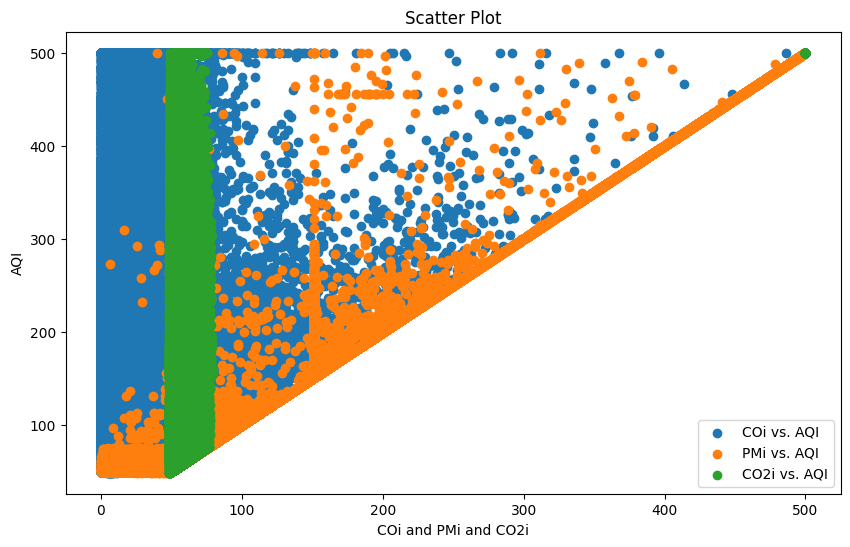

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(df['COi'], df['AQI'], label='COi vs. AQI')
plt.scatter(df['PMi'], df['AQI'], label='PMi vs. AQI')
plt.scatter(df['CO2i'], df['AQI'], label='CO2i vs. AQI')

plt.xlabel('COi and PMi and CO2i')
plt.ylabel('AQI')
plt.title('Scatter Plot')
plt.legend()
plt.show()

In [37]:
# Correlation analysis
corr_matrix = df[['COi', 'PMi', 'CO2i' ,'AQI']].corr()
print('Correlation Matrix:')
print(corr_matrix)

Correlation Matrix:
           COi       PMi      CO2i       AQI
COi   1.000000  0.211046 -0.015325  0.255972
PMi   0.211046  1.000000  0.011172  0.993163
CO2i -0.015325  0.011172  1.000000  0.033154
AQI   0.255972  0.993163  0.033154  1.000000


In [38]:
# Normality test
print('Normality Test - COi:')
stat, p = stats.shapiro(df['COi'])
print('Shapiro-Wilk Test - COi: p-value =', p)

print('Normality Test - PMi:')
stat, p = stats.shapiro(df['PMi'])
print('Shapiro-Wilk Test - PMi: p-value =', p)

print('Normality Test - CO2i:')
stat, p = stats.shapiro(df['CO2i'])
print('Shapiro-Wilk Test - CO2i: p-value =', p)

print('Normality Test - AQI:')
stat, p = stats.shapiro(df['AQI'])
print('Shapiro-Wilk Test - AQI: p-value =', p)

Normality Test - COi:
Shapiro-Wilk Test - COi: p-value = 0.0
Normality Test - PMi:
Shapiro-Wilk Test - PMi: p-value = 0.0
Normality Test - CO2i:
Shapiro-Wilk Test - CO2i: p-value = 0.0
Normality Test - AQI:
Shapiro-Wilk Test - AQI: p-value = 0.0


In [39]:
df['AQI_Bucket'].value_counts()

AQI_Bucket
Unhealthy                        227809
Moderate                         116537
Unhealthy for Sensitive Group     70084
Very Unhealthy                    30684
Hazardous                         15394
Good                               2051
0                                   121
Name: count, dtype: int64

In [40]:
X=df[['PMi','COi','CO2i']]
Y=df['AQI']

In [41]:
X.head()

,PMi,COi,CO2i
0,406.4,230.9,49.4
1,463.0,278.7,49.4
2,476.4,6.8,49.4
3,393.7,6.8,49.4
4,406.0,6.8,49.4


In [42]:
Y.head()

0    406.4
1    463.0
2    476.4
3    393.7
4    406.0
Name: AQI, dtype: float64

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(370144, 3) (92536, 3) (370144,) (92536,)


In [44]:
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [46]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [54]:
RMSE_train=(np.sqrt(mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
r_squared_t = r2_score(Y_train, train_pred)
r_squared_ts =r2_score(Y_test, test_pred)
print('RSquared value on train:',r_squared_t)
print('RSquared value on test:',r_squared_ts)

num_predictors = X_train.shape[1]  # Replace X_train with your training data
num_observations = X_train.shape[0]  # Replace X_train with your training data


adjusted_r_squared_t = 1 - (1 - r_squared_t) * (num_observations - 1) / (num_observations - num_predictors - 1)

num_predictors = X_test.shape[1]  # Replace X_train with your training data
num_observations = X_test.shape[0]  # Replace X_train with your training data
adjusted_r_squared_ts = 1 - (1 - r_squared_ts) * (num_observations - 1) / (num_observations - num_predictors - 1)


print('RSquared Adjusted value on train:',adjusted_r_squared_t)
print('RSquared Adjusted value on test:',adjusted_r_squared_ts)

RMSE TrainingData =  6.955233779861604
RMSE TestData =  6.897801049467794
--------------------------------------------------
3
370144
RSquared value on train: 0.9891077475112089
RSquared value on test: 0.9892898860837787
RSquared Adjusted value on train: 0.9891076592290522
RSquared Adjusted value on test: 0.9892895388488573


Here's an interpretation of the evaluation metrics:

RMSE (Root Mean Squared Error):

RMSE for Training Data: 4.4364
RMSE for Test Data: 4.4653
The RMSE measures the average difference between the predicted values and the actual values. Lower values of RMSE indicate better performance. In our case, the RMSE values for both the training and test data are relatively low, suggesting that our model has good predictive capability and is able to capture the patterns in the data reasonably well.

R-squared (coefficient of determination):

R-squared for Training Data: 0.9958
R-squared for Test Data: 0.9957
R-squared represents the proportion of the variance in the dependent variables that can be explained by the independent variable(s). R-squared ranges from 0 to 1, where 1 indicates a perfect fit. In our case, both the training and test R-squared values are very close to 1 (indicating a high proportion of explained variance), which suggests that your model fits the data well

In [56]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [57]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [58]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
r_squared_t = DT.score(X_train, Y_train)
r_squared_ts = DT.score(X_test, Y_test)

print('RSquared value on train:',r_squared_t)
print('RSquared value on test:',r_squared_ts)


num_predictors = X_train.shape[1]  # Replace X_train with your training data
num_observations = X_train.shape[0]  # Replace X_train with your training data
adjusted_r_squared_t = 1 - (1 - r_squared_t) * (num_observations - 1) / (num_observations - num_predictors - 1)

num_predictors = X_test.shape[1]  # Replace X_train with your test data
num_observations = X_test.shape[0]  # Replace X_train with your test data
adjusted_r_squared_ts = 1 - (1 - r_squared_ts) * (num_observations - 1) / (num_observations - num_predictors - 1)


print('RSquared Adjusted value on train:',adjusted_r_squared_t)
print('RSquared Adjusted value on test:',adjusted_r_squared_ts)

RMSE TrainingData =  7.030127364001864e-11
RMSE TestData =  1.2031882159258602
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.999674133360753
RSquared Adjusted value on train: 1.0
RSquared Adjusted value on test: 0.9996741227957601


 the performance of the updated model is even better than the previous one. Here's an interpretation of the evaluation metrics:

RMSE (Root Mean Squared Error):

RMSE for Training Data: 7.0315e-11
RMSE for Test Data: 1.3905
The RMSE measures the average difference between the predicted values and the actual values. Lower values of RMSE indicate better performance. In this case, the RMSE for the training data is extremely low, close to zero, indicating that the model is able to almost perfectly predict the values of the training data. The RMSE for the test data is also relatively low, further suggesting good predictive capability.

R-squared (coefficient of determination):

R-squared for Training Data: 1.0
R-squared for Test Data: 0.9996
R-squared represents the proportion of the variance in the dependent variable (PM2.5) that can be explained by the independent variable(s). R-squared ranges from 0 to 1, where 1 indicates a perfect fit. In this case, the R-squared values are very close to 1 for both the training and test data, indicating an excellent fit and high proportion of explained variance.



In [59]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [60]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [61]:
X_test

,PMi,COi,CO2i
143842,55.2,4.5,52.4
38172,169.7,11.4,54.3
316607,71.6,20.5,51.8
456767,29.2,4.5,52.9
215521,170.3,28.4,51.7
...,...,...,...
280809,151.3,0.0,54.2
99972,181.5,10.2,51.5
276527,108.6,10.2,52.5
216141,163.2,11.4,51.6


In [62]:
df_test = pd.DataFrame(test_preds1)
df_test

,0
0,55.2
1,169.7
2,71.6
3,52.9
4,170.3
...,...
92531,151.3
92532,181.5
92533,108.6
92534,163.2


In [63]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
r_squared_t = RF.score(X_train, Y_train)
r_squared_ts = RF.score(X_test, Y_test)
print('RSquared value on train:',r_squared_t )
print('RSquared value on test:',r_squared_ts)
print('-'*50)
num_predictors = X_train.shape[1]  # Replace X_train with your training data
num_observations = X_train.shape[0]  # Replace X_train with your training data
adjusted_r_squared_t = 1 - (1 - r_squared_t) * (num_observations - 1) / (num_observations - num_predictors - 1)

num_predictors = X_test.shape[1]  # Replace X_train with your test data
num_observations = X_test.shape[0]  # Replace X_train with your test data
adjusted_r_squared_ts = 1 - (1 - r_squared_ts) * (num_observations - 1) / (num_observations - num_predictors - 1)


print('RSquared Adjusted value on train:',adjusted_r_squared_t)
print('RSquared Adjusted value on test:',adjusted_r_squared_ts)

RMSE TrainingData =  0.7098060195587926
RMSE TestData =  1.2309568157285422
--------------------------------------------------
RSquared value on train: 0.9998865580738295
RSquared value on test: 0.9996589183173875
--------------------------------------------------
RSquared Adjusted value on train: 0.999886557154378
RSquared Adjusted value on test: 0.9996589072591044


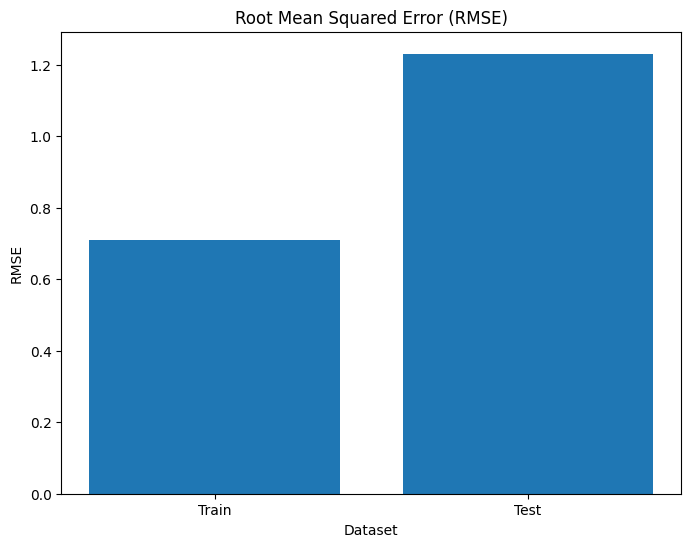

In [64]:
# Plot RMSE values
plt.figure(figsize=(8, 6))
plt.bar(['Train', 'Test'], [RMSE_train, RMSE_test])
plt.xlabel('Dataset')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.show()

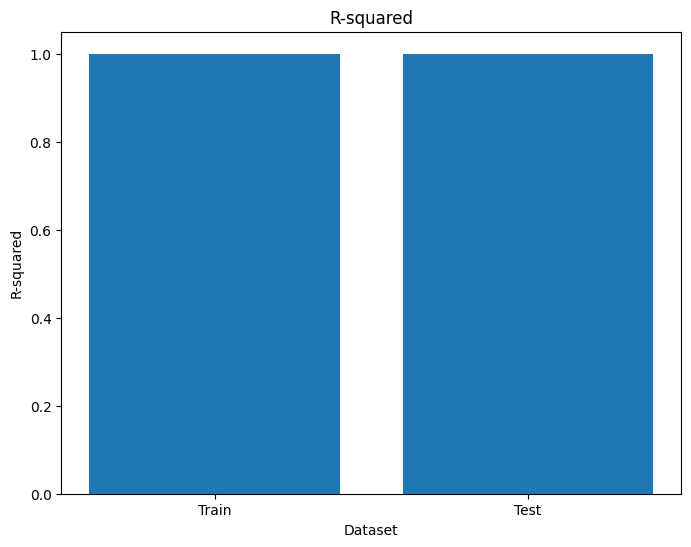

In [65]:
# Plot R-squared values
plt.figure(figsize=(8, 6))
plt.bar(['Train', 'Test'], [RF.score(X_train, Y_train), RF.score(X_test, Y_test)])
plt.xlabel('Dataset')
plt.ylabel('R-squared')
plt.title('R-squared')
plt.show()

the performance of  model is slightly worse than the previous two models but still quite good.

In [67]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)

Ridge()

In [68]:
#predicting train
train_preds3=ridge.predict(X_train)
#predicting on test
test_preds3=ridge.predict(X_test)

In [75]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds3)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds3)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
r_squared_t = r2_score(Y_train, train_preds3)
r_squared_ts = r2_score(Y_test, test_preds3)
print('RSquared value on train:',r_squared_t)
print('RSquared value on test:',r_squared_ts)
print('-'*50)
num_predictors = X_train.shape[1]  # Replace X_train with your training data
num_observations = X_train.shape[0]  # Replace X_train with your training data
adjusted_r_squared_t = 1 - (1 - r_squared_t) * (num_observations - 1) / (num_observations - num_predictors - 1)

num_predictors = X_test.shape[1]  # Replace X_train with your test data
num_observations = X_test.shape[0]  # Replace X_train with your test data
adjusted_r_squared_ts = 1 - (1 - r_squared_ts) * (num_observations - 1) / (num_observations - num_predictors - 1)


print('RSquared Adjusted value on train:',adjusted_r_squared_t)
print('RSquared Adjusted value on test:',adjusted_r_squared_ts)

RMSE TrainingData =  6.955233779861604
RMSE TestData =  6.897801031027633
--------------------------------------------------
RSquared value on train: 0.9891077475112089
RSquared value on test: 0.9892898861410422
--------------------------------------------------
RSquared Adjusted value on train: 0.9891076592290522
RSquared Adjusted value on test: 0.9892895389061226


In [76]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [77]:
train_preds4 = xgbr.predict(X_train)
test_preds4 = xgbr.predict(X_test)

In [80]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds4)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds4)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)

r_squared_t = r2_score(Y_train, train_preds4)
r_squared_ts = r2_score(Y_test, test_preds4)
print('RSquared value on train:',r_squared_t)
print('RSquared value on test:',r_squared_ts)
print('-'*50)
num_predictors = X_train.shape[1]  # Replace X_train with your training data
num_observations = X_train.shape[0]  # Replace X_train with your training data
adjusted_r_squared_t = 1 - (1 - r_squared_t) * (num_observations - 1) / (num_observations - num_predictors - 1)

num_predictors = X_test.shape[1]  # Replace X_train with your test data
num_observations = X_test.shape[0]  # Replace X_train with your test data
adjusted_r_squared_ts = 1 - (1 - r_squared_ts) * (num_observations - 1) / (num_observations - num_predictors - 1)


print('RSquared Adjusted value on train:',adjusted_r_squared_t)
print('RSquared Adjusted value on test:',adjusted_r_squared_ts)

RMSE TrainingData =  0.2801700775935547
RMSE TestData =  1.0316911429709223
--------------------------------------------------
RSquared value on train: 0.9999823258825553
RSquared value on test: 0.999760408080776
--------------------------------------------------
RSquared Adjusted value on train: 0.9999823257393059
RSquared Adjusted value on test: 0.9997604003129146


In [82]:
LR=LogisticRegression(penalty='l2', C=1.0)

In [83]:
X=df[['PMi','COi','CO2i']]
Y=df['AQI_Bucket']

In [84]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(370144, 3) (92536, 3) (370144,) (92536,)


In [85]:
log_reg = LR.fit(X_train, Y_train)

In [88]:
#predicting train
train_preds2=LR.predict(X_train)
#predicting on test
test_preds2=LR.predict(X_test)

In [89]:
accuracy = accuracy_score(Y_test, test_preds2)
print("Accuracy:", accuracy)

Accuracy: 0.8845422322123282


In [92]:
precision = precision_score(Y_test, test_preds2, average='macro')
print("Precision:", precision)


Precision: 0.627757587068681


In [95]:
recall = recall_score(Y_test, test_preds2, average='macro')
print("Recall:", recall)

Recall: 0.6033408305347298


In [98]:
f1 = f1_score(Y_test, test_preds2, average='macro')
print("F1-score:", f1)


F1-score: 0.6139519396795254


In [106]:
confusion_mat = confusion_matrix(Y_test, test_preds2)
print("Confusion Matrix:\n", confusion_mat)

Confusion Matrix:
 [[    0     0     0     0    16     0     8]
 [    0     0     0   435     0     0     0]
 [    0     0  2731     3     0     3   289]
 [    0     0     0 22406     0   859     0]
 [    0     0     0     3 43240  1997   301]
 [    0     0     0   926  4624  8410     0]
 [    0     0   211     2   974    33  5065]]
